# Summary:

### imports

In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal

# interpolation because ARDUINO data is spaced unevenly
import scipy.interpolate as interpolate

import pickle # save data
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [4]:
# for all .mat files in this folder starting with "ToneDisc_ANChandler_p1_" in their name
folder_name = './Joey/Phase1/ToneDisc_ANJoey_p1_'

### sort through relevant .mat files found in folder by day ("_d#")

In [5]:
unsorted_mat_files = glob.glob(folder_name+'*.mat')
sorted_mat_files = sorted(unsorted_mat_files, key=lambda x: int(re.search(r'\d+.mat$',x).group()[:-4]))
sorted_mat_files

['./Joey/Phase1/ToneDisc_ANJoey_p1_d1.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d2.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d3.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d4.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d5.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d6.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d7.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d8.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d9.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d10.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d11.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d12.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d13.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d14.mat']

### get `movements_vars` and calculate `cumulative_sqrt_var`, $\int\limits_{0}^{100} Var(t)dt$, and save to `cumulative_vars`

In [11]:
cumulative_vars = []
for mat_file in sorted_mat_files:
    file = open(mat_file+'_movements_vars.pickle', 'rb')
    movements_var = pickle.load(file)
    file.close()

    # Compute the area using the composite trapezoidal rule.
    cumulative_var = np.trapz(movements_var, dx=5)
    print("cumalative_var: ", cumulative_var)
    cumulative_vars.append(cumulative_var)

cumalative_var:  2.9083639649471693
cumalative_var:  2.9418598405067087
cumalative_var:  1.2938351396126162
cumalative_var:  1.2947059906556355
cumalative_var:  0.3885463850224033
cumalative_var:  8.759509619192238
cumalative_var:  1.7708943600330258
cumalative_var:  1.9689124138069567
cumalative_var:  3.0558641520989203
cumalative_var:  5.433017653108981
cumalative_var:  46.750705772641126
cumalative_var:  0.4642490571562672
cumalative_var:  0.9236575610141614
cumalative_var:  1.4960698127662868


### plot `cumulative_vars` over days

(0.0, 10.0)

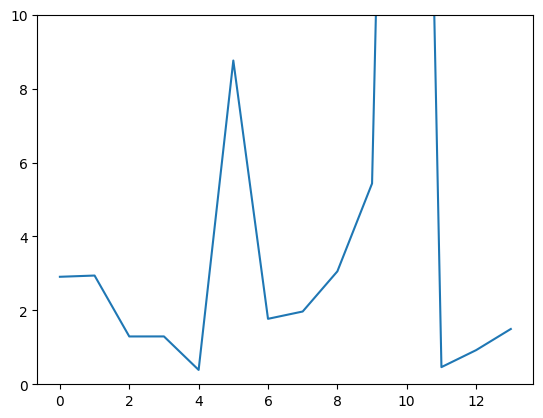

In [13]:
plt.plot(range(0,len(cumulative_vars)),cumulative_vars)
plt.ylim([0,10])